In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_path319 = r"C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris319.pkl"
file_path320 = r"C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris320.pkl"
file_path321 = r"C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris321.pkl"
file_path332 = r"C:\Users\shuber\OneDrive - LNConsult GmbH\Desktop\Administratives\TUDelft\TIL Phython\Flights\paris332.pkl"

df319 = pd.read_pickle(file_path319)
df320 = pd.read_pickle(file_path320)
df321 = pd.read_pickle(file_path321)
df332 = pd.read_pickle(file_path332)

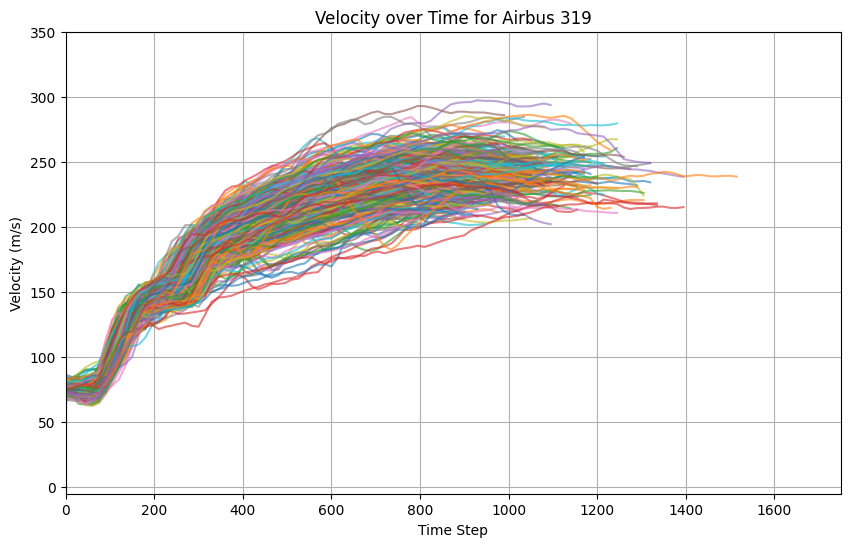

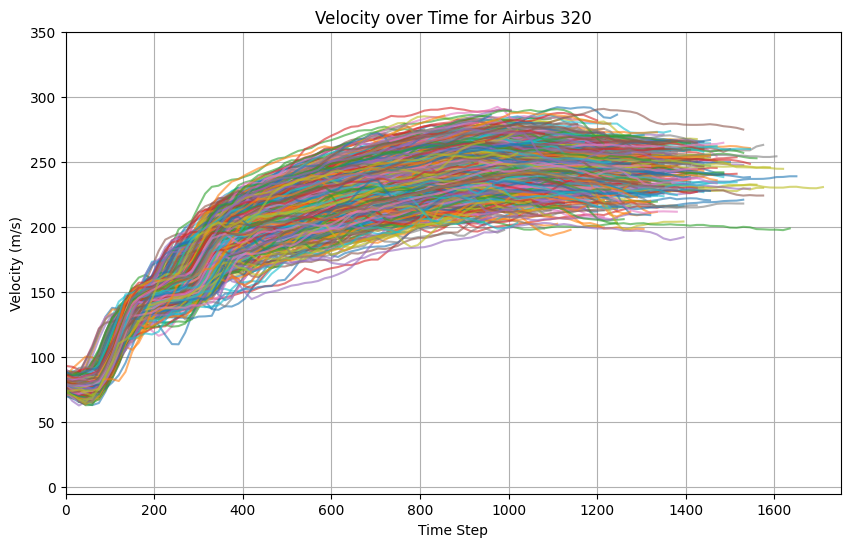

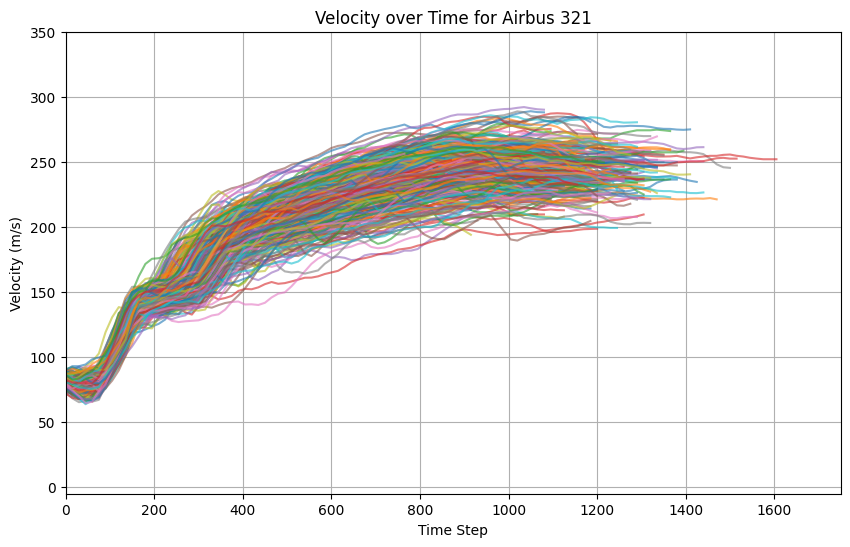

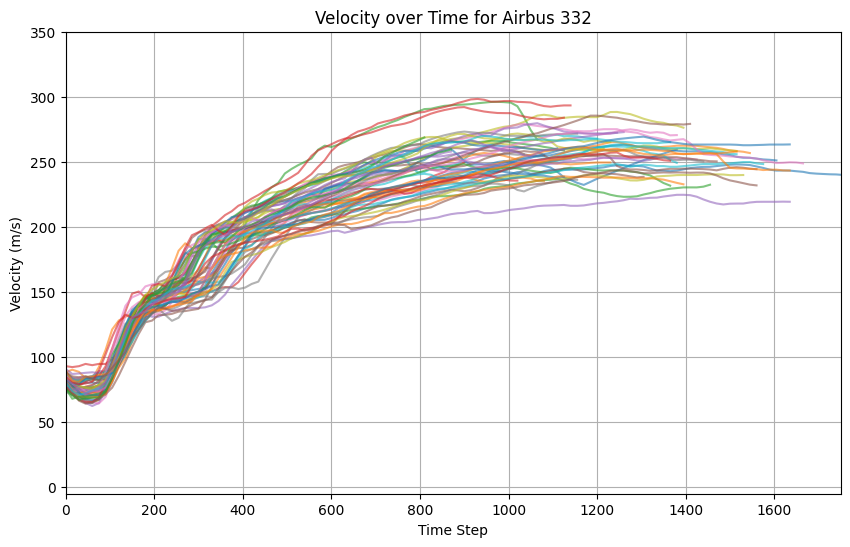

In [3]:
# Function to plot velocity over time
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['timestep'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Time Step')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 1750)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

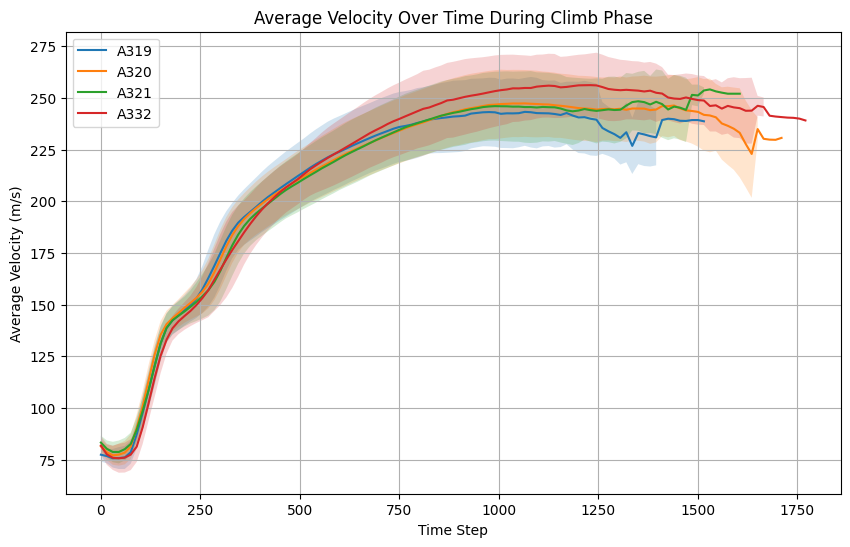

In [7]:
aircraft_data = {'A319': df319, 'A320': df320, 'A321': df321, 'A332': df332}
airplane_models = ['A319', 'A320', 'A321', 'A332']

plt.figure(figsize=(10, 6))

for model in airplane_models:
    df = aircraft_data[model]
    grouped = df.groupby('timestep')['velocity']
    average_velocity = grouped.mean()
    std_velocity = grouped.std()

 # Fill the corridors for standard deviation   
    plt.plot(average_velocity, label=model)
    plt.fill_between(average_velocity.index, 
                     average_velocity - std_velocity, 
                     average_velocity + std_velocity, 
                     alpha=0.2)

# Add labels and other plot details
plt.title('Average Velocity Over Time During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Average Velocity (m/s)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Velocity_vs_Time.png', dpi=300, bbox_inches='tight')
plt.show()


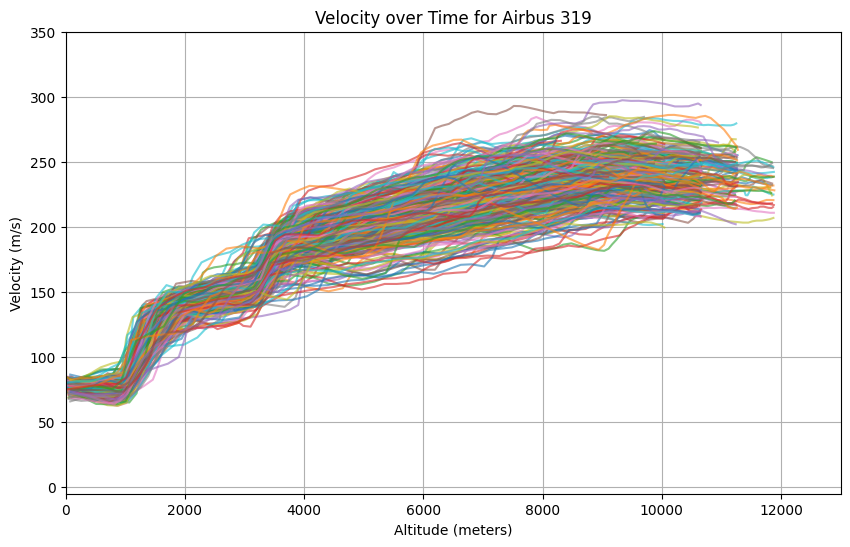

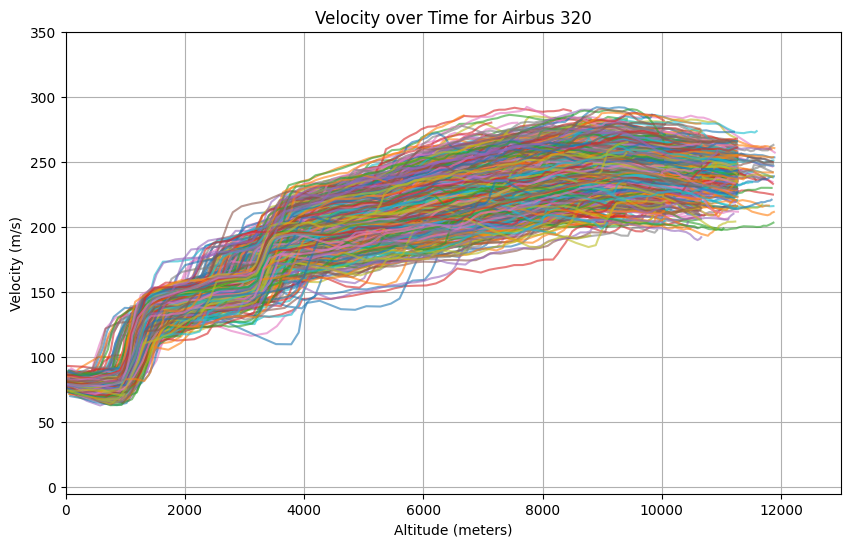

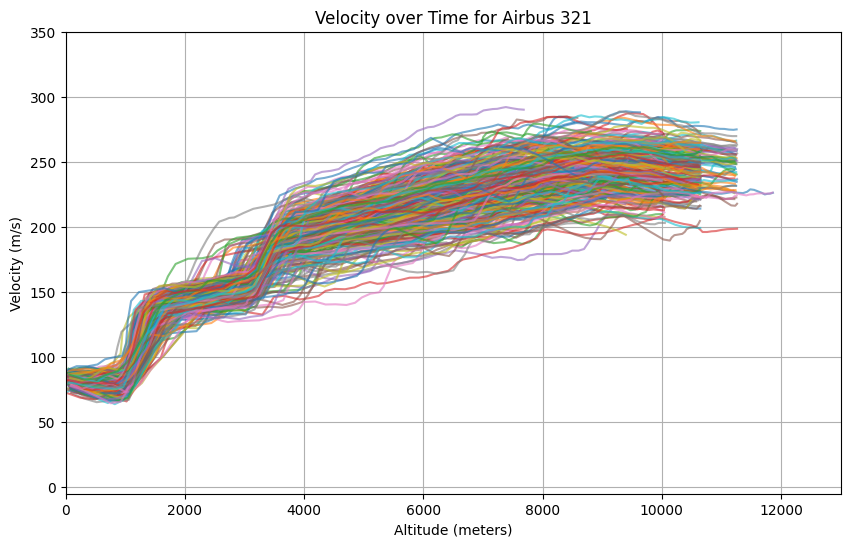

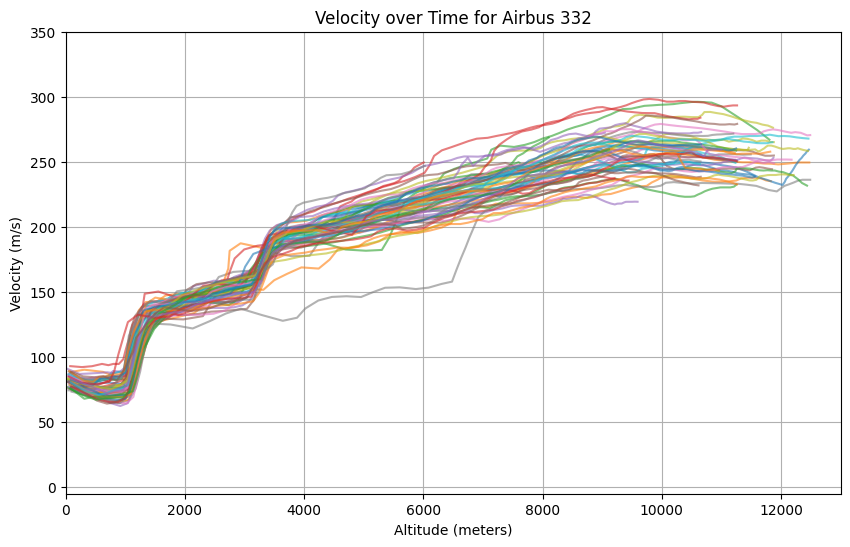

In [5]:
def plot_velocity(df, aircraft_model, xlims, ylims):
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['baroaltitude'], group['velocity'], label=f'Segment {segment}', alpha=0.6)
    plt.title(f'Velocity over Time for {aircraft_model}')
    plt.xlabel('Altitude (meters)')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.show()

# Define x and y limits
x_limits = (0, 13000)  
y_limits = (-5, 350)

# Plot for each aircraft
plot_velocity(df319, 'Airbus 319', x_limits, y_limits)
plot_velocity(df320, 'Airbus 320', x_limits, y_limits)
plot_velocity(df321, 'Airbus 321', x_limits, y_limits)
plot_velocity(df332, 'Airbus 332', x_limits, y_limits)

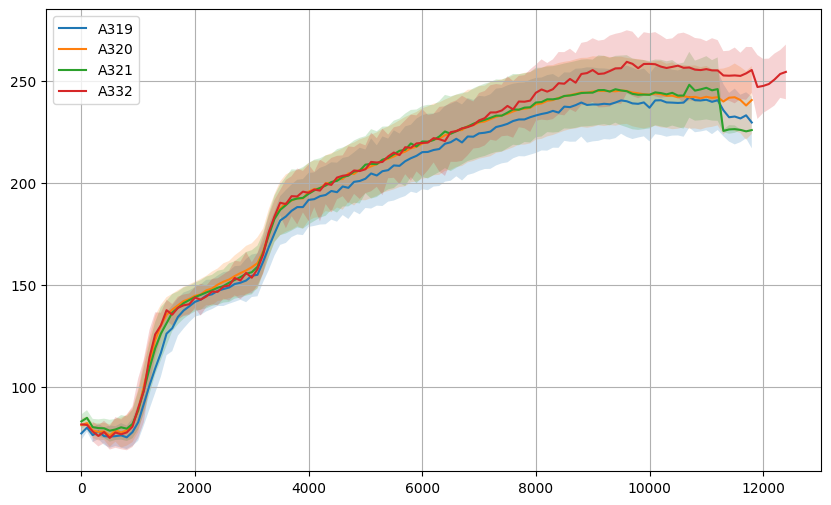

In [6]:
plt.figure(figsize=(10, 6))

for model in airplane_models:
    df = aircraft_data[model]
    df['baroaltitude_int'] = df['baroaltitude'] // 100 * 100
    grouped = df.groupby('baroaltitude_int')['velocity']
    average_altitude = grouped.mean()
    std_altitude = grouped.std()

# Fill the corridors for standard deviation  
    plt.plot(average_altitude, label=model.replace('.pkl', ''))
    plt.fill_between(average_altitude.index, 
                     average_altitude - std_altitude, 
                     average_altitude + std_altitude, 
                     alpha=0.2)

# Plot for each aircraft
plt.title('Average Velocity Over Altitude During Climb Phase (With Ranges)')
plt.xlabel('Time Step')
plt.ylabel('Altitude (meters)')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Velocity_vs_Altitude.png', dpi=300, bbox_inches='tight')
plt.show()
